# Myanmar Coup fatality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [1]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-List-for-Jan-5-2022-English.pdf", pages='1-end')
tables.n

170

In [35]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's \nname,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home \nAddress,Township,States/Region\ns,Remarks
1,1,Na Pwar (aka) Ko \nNyi Nyi Oo,M,32,U Hla Ngwe 08-Feb-21,,8-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Maha Aung \nMyay,Mandalay,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,Naypyitaw,"Hlaykhwintaun\ng, Lower \nPaunglaung \nHydro P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup \nprotests i..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win \n(aka) Min Min,M,37,U Maung \nSan,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Maha Aung \nMyay,Mandalay,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1351 Arkar Phyo,,M,,Unknown \nName,31-Dec-21,2-Jan-22,Dancer \n(Traditional),Interrogation \nCenter (Monywa),,Monywa,Sagaing,"On December 31, 2021, six youths,\nincluding\n..."
1352,1352 Nyi Nyi Sein,,M,50,Unknown \nName,17-Dec-21,17-Dec-21,Teacher,Interrogation \nCenter,Pauk Taw \nVillage,Myaung,Sagaing,The middle\nschool\nteacher named\nNyi Nyi Sei...
1353,1353 Hla Min Thein,,M,45,U Maung \nMaung \nThein,1-Jan-22,3-Jan-22,Civilian,Interrogation \nCenter,Ayoegone Ward Tamwe,,Yangon,"On the night of January 1, Hla Min\nThein,\nli..."
1354,1354,Thein Soe (aka) \nThan Soe,M,,Unknown \nName,26-Dec-21,3-Jan-22,NLD youth,Interrogation \nCenter,,Taungthar,Mandalay,"Thein Soe a.k.a Than Soe, who is a\nmember\nof..."


## Cleanup data

 Cleanup newline (\n)

In [36]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe 08-Feb-21,,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,Naypyitaw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1351 Arkar Phyo,,M,,Unknown Name,31-Dec-21,2-Jan-22,Dancer (Traditional),Interrogation Center (Monywa),,Monywa,Sagaing,"On December 31, 2021, six youths,includingtrad..."
1352,1352 Nyi Nyi Sein,,M,50,Unknown Name,17-Dec-21,17-Dec-21,Teacher,Interrogation Center,Pauk Taw Village,Myaung,Sagaing,"The middleschoolteacher namedNyi Nyi Sein,livi..."
1353,1353 Hla Min Thein,,M,45,U Maung Maung Thein,1-Jan-22,3-Jan-22,Civilian,Interrogation Center,Ayoegone Ward Tamwe,,Yangon,"On the night of January 1, Hla MinThein,living..."
1354,1354,Thein Soe (aka) Than Soe,M,,Unknown Name,26-Dec-21,3-Jan-22,NLD youth,Interrogation Center,,Taungthar,Mandalay,"Thein Soe a.k.a Than Soe, who is amemberof NLD..."


Fix column names

In [37]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [38]:
header[-5] = 'Place of Incidents'
header[-4] = 'Home Address'
header[-3] = 'Township'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [39]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset = dataset.drop(dataset.tail(1).index)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe 08-Feb-21,,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,Naypyitaw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
5,,5 Wai Yan Tun,M,16,Unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1350 Zin Min Htike,,M,46,Unknown Name,1-Jan-22,1-Jan-22,Volunteer,Interrogation Center,"No (4) ward, U Pyanphyu Road",Taungoo,Bago,"Philanthropist, Zin Min Htike, livinginBagoReg..."
1351,1351 Arkar Phyo,,M,,Unknown Name,31-Dec-21,2-Jan-22,Dancer (Traditional),Interrogation Center (Monywa),,Monywa,Sagaing,"On December 31, 2021, six youths,includingtrad..."
1352,1352 Nyi Nyi Sein,,M,50,Unknown Name,17-Dec-21,17-Dec-21,Teacher,Interrogation Center,Pauk Taw Village,Myaung,Sagaing,"The middleschoolteacher namedNyi Nyi Sein,livi..."
1353,1353 Hla Min Thein,,M,45,U Maung Maung Thein,1-Jan-22,3-Jan-22,Civilian,Interrogation Center,Ayoegone Ward Tamwe,,Yangon,"On the night of January 1, Hla MinThein,living..."


Parse age that inclulde string

In [40]:
def parse_age(age):
  age = age.replace('+', '')
  
  if age.find(' ') > 0:
    if 'Around one-years-old' in age:
      return '1'
    else:
      strList = age.split(' ')
      return strList[strList.index(next(filter(lambda x: x.isdigit(), strList)))] 
  return age

dataset['Age'] = dataset['Age'].apply(parse_age)

Expand combined row

In [41]:
for index, row in dataset.iterrows():
    name = row['Name']
    numbers = [int(s) for s in name.split() if s.isdigit()]

    # Number exist in name case
    if len(numbers) > 0:
        # Remove number from name
        dataset.at[index,'Name']= name.replace(str(numbers[0]), '').strip()
        
        # Combined row case
        if row['No.'] != '' and 'unknown name' in name.lower():
            for i in range(numbers[0] - 1):
                dataset = dataset.append(row)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe 08-Feb-21,,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,09-Feb-21,19-Feb-21,Student,Naypyitaw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
5,,Wai Yan Tun,M,16,Unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1350 Zin Min Htike,,M,46,Unknown Name,1-Jan-22,1-Jan-22,Volunteer,Interrogation Center,"No (4) ward, U Pyanphyu Road",Taungoo,Bago,"Philanthropist, Zin Min Htike, livinginBagoReg..."
1351,1351 Arkar Phyo,,M,,Unknown Name,31-Dec-21,2-Jan-22,Dancer (Traditional),Interrogation Center (Monywa),,Monywa,Sagaing,"On December 31, 2021, six youths,includingtrad..."
1352,1352 Nyi Nyi Sein,,M,50,Unknown Name,17-Dec-21,17-Dec-21,Teacher,Interrogation Center,Pauk Taw Village,Myaung,Sagaing,"The middleschoolteacher namedNyi Nyi Sein,livi..."
1353,1353 Hla Min Thein,,M,45,U Maung Maung Thein,1-Jan-22,3-Jan-22,Civilian,Interrogation Center,Ayoegone Ward Tamwe,,Yangon,"On the night of January 1, Hla MinThein,living..."


Drop unused columns

In [42]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions', 'Remarks'])
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1350,M,46,1-Jan-22,Volunteer
1351,M,,31-Dec-21,Dancer (Traditional)
1352,M,50,17-Dec-21,Teacher
1353,M,45,1-Jan-22,Civilian


## Explore data

In [43]:
dataset.describe()

,Sex,Age,Date of Incident,Organization
count,1354,1354,1354,1354
unique,5,73,256,125
top,M,,27-Mar-21,Civilian
freq,1221,317,162,1110


In [44]:
dataset['Sex'].value_counts()

M       1221
F        100
          31
LGBT       1
M/F        1
Name: Sex, dtype: int64

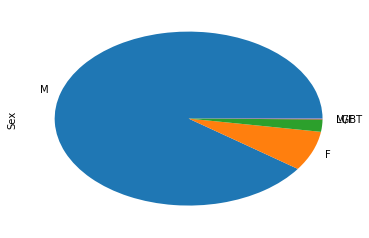

In [45]:
dataset['Sex'].value_counts().plot(kind='pie')


In [46]:
dataset['Age'].value_counts()

      317
30     65
40     59
19     52
20     47
     ... 
87      1
8       1
90      1
64      1
66      1
Name: Age, Length: 73, dtype: int64

(array([ 10., 155., 334., 258., 158.,  72.,  33.,  13.,   3.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

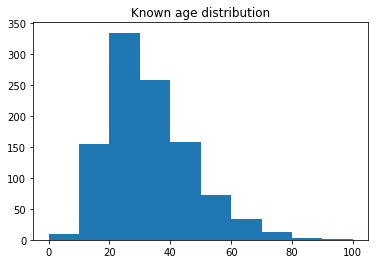

In [47]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [48]:
dataset['Organization'].value_counts()

Civilian                                              1110
Student                                                 64
Teacher                                                 17
Volunteer                                                7
NLD                                                      5
                                                      ... 
Gilgal Church                                            1
Student, 1st Year, Civil                                 1
Freeland photographer                                    1
Civilian (Owner of Htike Htike Pure Water Factory)       1
Former Medical Student                                   1
Name: Organization, Length: 125, dtype: int64

In [49]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                           1116
Student                                              85
Teacher                                              23
NLD                                                  18
Doctor/Nurse                                          9
                                                   ... 
Security Force, Police (CDM)                          1
Cilivian                                              1
PDF                                                   1
Freeland photographer                                 1
Business, Eain Phyu Taw, Spare Auto Parts Store       1
Name: Organization, Length: 69, dtype: int64

In [50]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian                                                 1116
Student                                                    85
Other                                                      68
Teacher                                                    23
NLD                                                        18
Doctor/Nurse                                                9
Civil Servant                                               8
Volunteer                                                   7
Engineer                                                    6
Farmer                                                      5
Activist                                                    5
Karenni National People's Liberation Front (Kalalata)       4
Name: Organization, dtype: int64

In [51]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1350,M,46,1-Jan-22,Volunteer
1351,M,,31-Dec-21,Other
1352,M,50,17-Dec-21,Teacher
1353,M,45,1-Jan-22,Civilian


## Export JSON

In [52]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization']
dataset

,sex,age,dateOfIncident,organization
1,M,32,,Civilian
2,F,19,09-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1350,M,46,1-Jan-22,Volunteer
1351,M,,31-Dec-21,Other
1352,M,50,17-Dec-21,Teacher
1353,M,45,1-Jan-22,Civilian


In [53]:
dataset.to_csv('recent-fatality.csv', index=False)